**BDA Lab Exercise 1.a**

**Name** : Divyanshu Chaudhari

**Roll no** : MCS20014

In [183]:
import matplotlib.pyplot as plt    #visualisation of data
import seaborn as sns              #visualisation of data
import pandas as pd                #Data Manipulation and Analysis


In [184]:
from google.colab import drive     #Importing module for mounting drive in google collab

In [185]:
drive.mount('/content/drive')      #Drive mounted

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [186]:
df = pd.read_csv('/content/drive/MyDrive/twitter_dataset.csv')  #Read twitter dataset in df

In [187]:
df.head(5)   # To display the top 5 rows 

,tweet_id,tweet_created_at,tweet_created_on_holiday_bool,tweet_created_on_weekend_bool,tweet_created_at_noon_bool,tweet_created_at_eve_bool,user_id,user_screen_name,user_screen_name_length,user_no_of_tweets,user_no_of_followers,user_no_of_followings,user_account_age,user_no_of_favourites,user_average_tweets,user_average_favourites,user_account_location,tweet_text,tweet_text_length,tweet_text_optimal_length,tweet_text_no_of_hashtags,tweet_text_contains_hashtags,tweet_text_contains_url,tweet_text_no_of_user_mentions,tweet_text_contains_user_mentions,tweet_text_sentiment,tweet_text_contains_media,tweet_text_contains_number,tweet_text_contains_upper_words,tweet_text_contains_lower_words,tweet_text_contains_excl,tweet_text_contains_retweet_suggestion,retweeted,retweets
0,~1357587318119407616~,Fri Feb 05 07:10:14 +0000 2021,0,0,0,0,~327890669~,mavirise,8,4355,49,57,3506,801,1.242156,0.228465,"Shimla Urban, India",104 Govt should repeal anti farmer laws !! #Fa...,99,1,3,1,0,0,0,nue,0,1,0,1,1,0,False,0
1,~1357587287681323010~,Fri Feb 05 07:10:06 +0000 2021,0,0,0,0,~327890669~,mavirise,8,4355,49,57,3506,801,1.242156,0.228465,"Shimla Urban, India",103 Govt should repeal anti farmer laws !! #Fa...,99,1,3,1,0,0,0,nue,0,1,0,1,1,0,False,0
2,~1357587268689485825~,Fri Feb 05 07:10:02 +0000 2021,0,0,0,0,~1216545386040418304~,aman89086818,12,48,0,7,389,39,0.123393,0.100257,NaN,Thank you internaltional celebrity who stand w...,75,1,1,1,0,0,0,nue,0,0,0,1,0,0,False,0
3,~1357587262469525507~,Fri Feb 05 07:10:00 +0000 2021,0,0,0,0,~1731144182~,jagbirsingh111,14,196,2,10,2710,97,0.072325,0.035793,NaN,@cnni They are just govt's puppet.that's why t...,129,0,2,1,0,1,1,neg,0,0,0,1,0,0,False,0
4,~1357587255699775488~,Fri Feb 05 07:09:59 +0000 2021,0,0,0,0,~327890669~,mavirise,8,4355,49,57,3506,801,1.242156,0.228465,"Shimla Urban, India",102 Govt should repeal anti farmer laws !! #Fa...,99,1,3,1,0,0,0,nue,0,1,0,1,1,0,False,0


In [188]:
print(df.retweets)   #To print retweets column

0        0
1        0
2        0
3        0
4        0
        ..
25689    3
25690    1
25691    6
25692    4
25693    0
Name: retweets, Length: 25694, dtype: int64


In [189]:
df.retweets.value_counts()    #Counts of each retweet to get an idea of distribution of data

0      15827
1       4677
2       1683
3        776
4        498
       ...  
424        1
216        1
200        1
184        1
407        1
Name: retweets, Length: 294, dtype: int64

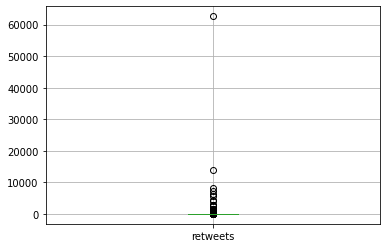

In [190]:
df.boxplot(column=['retweets'])   #To visualize the data distribution retweets column

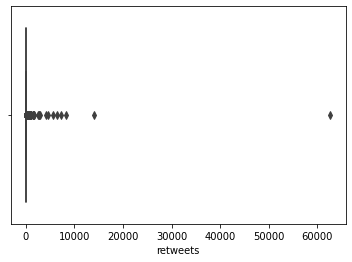

In [191]:
sns.boxplot(x=df['retweets'])    #Using seaborn module method to create a boxplot for visualization

In [192]:
df.describe()      #To understand the data well

,tweet_created_on_holiday_bool,tweet_created_on_weekend_bool,tweet_created_at_noon_bool,tweet_created_at_eve_bool,user_screen_name_length,user_no_of_tweets,user_no_of_followers,user_no_of_followings,user_account_age,user_no_of_favourites,user_average_tweets,user_average_favourites,tweet_text_length,tweet_text_optimal_length,tweet_text_no_of_hashtags,tweet_text_contains_hashtags,tweet_text_contains_url,tweet_text_no_of_user_mentions,tweet_text_contains_user_mentions,tweet_text_contains_media,tweet_text_contains_number,tweet_text_contains_upper_words,tweet_text_contains_lower_words,tweet_text_contains_excl,tweet_text_contains_retweet_suggestion,retweets
count,25694.0,25694.000000,25694.000000,25694.000000,25694.000000,25694.000000,2.569400e+04,25694.000000,25694.000000,25694.000000,25694.000000,25694.000000,25694.000000,25694.000000,25694.000000,25694.000000,25694.000000,25694.000000,25694.000000,25694.000000,25694.000000,25694.000000,25694.000000,25694.000000,25694.000000,25694.000000
mean,0.0,0.015256,0.096404,0.080213,11.995135,5521.590255,2.410177e+03,402.654705,1270.251382,5792.574103,16.547797,15.575795,110.292597,0.175605,1.249708,0.705846,0.619717,0.657975,0.385615,0.119327,0.663813,0.214992,0.892387,0.093329,0.234140,9.884954
std,0.0,0.122574,0.295150,0.271628,2.567414,20504.915268,8.179765e+04,1219.261763,1406.534540,18283.982312,49.988627,41.774679,33.680963,0.380491,1.183835,0.455671,0.485466,1.153367,0.486750,0.324180,0.472413,0.410825,0.309897,0.290899,0.423469,415.079240
min,0.0,0.000000,0.000000,0.000000,4.000000,1.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.000000,0.000000,0.000000,10.000000,95.000000,8.000000e+00,38.000000,67.000000,97.000000,0.256579,0.225150,82.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,0.0,0.000000,0.000000,0.000000,12.000000,651.000000,4.900000e+01,118.000000,487.000000,666.000000,1.536703,1.933333,127.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,0.0,0.000000,0.000000,0.000000,14.000000,4019.000000,2.507500e+02,345.750000,2391.750000,3854.500000,9.493349,10.175119,140.000000,0.000000,2.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000
max,0.0,1.000000,1.000000,1.000000,15.000000,829961.000000,5.483319e+06,79636.000000,5044.000000,451377.000000,985.571429,1024.000000,152.000000,1.000000,10.000000,1.000000,1.000000,11.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,62666.000000


In [193]:
df.isnull().any()    #To know if there is any NA/NULL cell in the dataset

tweet_id                                  False
tweet_created_at                          False
tweet_created_on_holiday_bool             False
tweet_created_on_weekend_bool             False
tweet_created_at_noon_bool                False
tweet_created_at_eve_bool                 False
user_id                                   False
user_screen_name                          False
user_screen_name_length                   False
user_no_of_tweets                         False
user_no_of_followers                      False
user_no_of_followings                     False
user_account_age                          False
user_no_of_favourites                     False
user_average_tweets                       False
user_average_favourites                   False
user_account_location                      True
tweet_text                                False
tweet_text_length                         False
tweet_text_optimal_length                 False
tweet_text_no_of_hashtags               

* *user_account_location shows True, indicating it has some null/NAN values* 

In [194]:
df["user_account_location"].isnull().sum()   #Number of rows having Null value,Null values is automatically handled by pandas by replacing them with NAN

11436

(array([25435.,   257.]),
 array([    0,   100, 10000]),
 <a list of 2 Patch objects>)

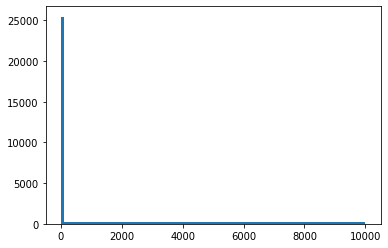

In [195]:
plt.hist(df.retweets,bins = [0,100,10000])   #Using histogram to visualize the frequency distribution of retweets

Basically, I am interested in binning the data in the below categories :

1.   Not Trending
2.   Moderately Trending
3.   Reasonably Trending
4.   Highly trending

Logic behind naming is:

*The more the retweets,the more it is trending.*

Based on my analysis  of the retweets data using histogram and boxplot,I found out the below insights:


*   Nearly 90% of the retweets were in the range of 0 to 3/4 retweets.
*   Nearly 9% of the retweets were in the range of 4 to 1000 retweets.
*   Nearly 0.1% of the retweets were in the range 1000 to 10000.
*   Nearly 0.001% of the retweets were greater than 10000.

So, the mathematical logic I chose for this was:



1.   I binned the initial 90 percentile of the retweets to "Not Trending" bin.
2.   The next 9.9 percentile to "Moderately Trending " bin.
3.   The next 0.1 percentile to "Resonably Trending" bin.
4.   And the top 0.001 percentile to "Highly Trending" bin.

Method used to bin the data is qcut().

Using this method,I created a new column "trending_level" which gives us the trend level of that tweet.










In [196]:
retweets_label = ["Not Trending","Moderately Trending","Reasonably Trending","Highly Trending"]      #Labels representig the bins
df['trending_level'],bin_edges = pd.qcut(df['retweets'],q = [0,.9,.999,.9999,1],precision=4,labels=retweets_label,retbins = True)  #Mathematical logic for bins using qcut function
df.tail(5)

,tweet_id,tweet_created_at,tweet_created_on_holiday_bool,tweet_created_on_weekend_bool,tweet_created_at_noon_bool,tweet_created_at_eve_bool,user_id,user_screen_name,user_screen_name_length,user_no_of_tweets,user_no_of_followers,user_no_of_followings,user_account_age,user_no_of_favourites,user_average_tweets,user_average_favourites,user_account_location,tweet_text,tweet_text_length,tweet_text_optimal_length,tweet_text_no_of_hashtags,tweet_text_contains_hashtags,tweet_text_contains_url,tweet_text_no_of_user_mentions,tweet_text_contains_user_mentions,tweet_text_sentiment,tweet_text_contains_media,tweet_text_contains_number,tweet_text_contains_upper_words,tweet_text_contains_lower_words,tweet_text_contains_excl,tweet_text_contains_retweet_suggestion,retweeted,retweets,trending_level
25689,~1355564551308275712~,Sat Jan 30 17:12:28 +0000 2021,0,1,0,0,~1335769041009602561~,sikh_lives,10,166,8,18,60,100,2.766667,1.666667,NaN,Reshare to support (Tiktok:indersinsights)\n#P...,133,0,3,1,1,0,0,nue,0,1,0,1,0,1,False,3,Not Trending
25690,~1355507144536195084~,Sat Jan 30 13:24:22 +0000 2021,0,1,1,0,~3151632787~,KirthiGanesh1,13,1990,335,402,2126,2722,0.936030,1.280339,Bangalore,People who don’t even live in India are suppor...,140,0,0,0,1,0,0,pos,0,0,0,1,0,1,False,1,Not Trending
25691,~1355367760428204034~,Sat Jan 30 04:10:30 +0000 2021,0,1,0,0,~1335769041009602561~,sikh_lives,10,166,8,18,60,100,2.766667,1.666667,NaN,Re-share to support farmers✊🏼✊🏼#IStandWithFarm...,128,0,3,1,1,0,0,nue,0,1,0,1,0,1,False,6,Moderately Trending
25692,~1355311702347284490~,Sat Jan 30 00:27:44 +0000 2021,0,1,0,0,~1250250795142045696~,atwal1_rosey,12,1629,271,603,296,1117,5.503378,3.773649,"Richmond, London",Thank you @TamikaGHamilton. World need to see ...,133,0,2,1,1,1,1,nue,0,1,0,1,0,0,False,4,Not Trending
25693,~1354874830772965383~,Thu Jan 28 19:31:46 +0000 2021,0,0,0,1,~1334154226604384257~,swappan1,8,806,199,555,65,559,12.400000,8.600000,ਪੰਜਾਬ,OUR FARMERS-RESPECT INDIAN FLAG #FarmerProtest...,130,0,4,1,1,0,0,nue,0,1,1,0,0,1,False,0,Not Trending


In [197]:
result_table  = pd.DataFrame(zip(bin_edges,retweets_label),columns=['Limits','Tier'])   #Result table to know the current thresholds of my bins
print(result_table)

      Limits                 Tier
0     0.0000         Not Trending
1     4.0000  Moderately Trending
2   810.0000  Reasonably Trending
3  7708.9921      Highly Trending


# **Thank you**